In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [9]:
n_train = int(n*0.8)
n_test  = n - n_train
#X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train,1))
Y_test = np.zeros((n_test,1))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1]).reshape((n_train,1))

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1]).reshape((n_test,1))

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(399, 190)
(100, 190)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', '

In [30]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 300
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 3 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.001
EP = 1000
samp = 10000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))

#Training the neural network
def g(A):
    return (np.maximum(A,0))

def gd(A):
    return (np.minimum(np.maximum(A,0),1))


for ep in range(EP):
    #print(ep)

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        w2 += lr*d2
        w1 += lr*d1

0 0.0156078835193 0.00885986661467
1 0.00827701197951 855982144.538
2 0.00827726595384 855469418.304
3 0.00827726502382 855469418.304
4 0.00827726382322 855469418.304
5 0.00827725881176 855469418.304
6 0.00826718416981 855469418.304
7 0.00827726674153 855469040.54
8 0.00827726673614 855469040.54
9 0.0082772667328 855469040.54
10 0.00827726673003 855469040.54
11 0.00827726672762 855469040.54
12 0.00827726672549 855469040.54
13 0.00827726672358 855469040.54
14 0.00827726672186 855469040.54
15 0.00827726672033 855469040.54
16 0.00827726671895 855469040.54
17 0.00827726671772 855469040.54
18 0.00827726671661 855469040.54
19 0.00827726671561 855469040.54
20 0.00827726671472 855469040.54
21 0.00827726671392 855469040.54
22 0.0082772667132 855469040.54
23 0.00827726671256 855469040.54
24 0.00827726671198 855469040.54
25 0.00827726671146 855469040.54
26 0.00827726671099 855469040.54
27 0.00827726671058 855469040.54
28 0.0082772667102 855469040.54
29 0.00827726670987 855469040.54
30 0.008277266

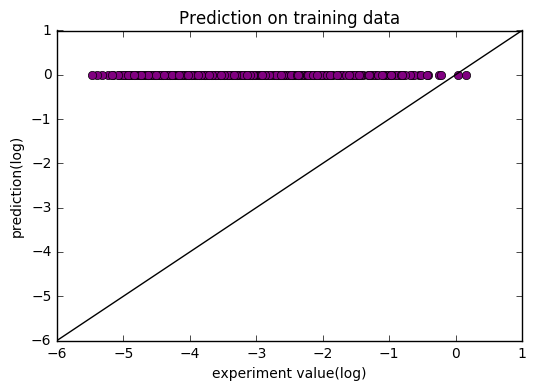

In [5]:
yh = g(X_train.dot(w1)).dot(w2)
plt.plot(Y_train,yh,"o",color ='purple')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

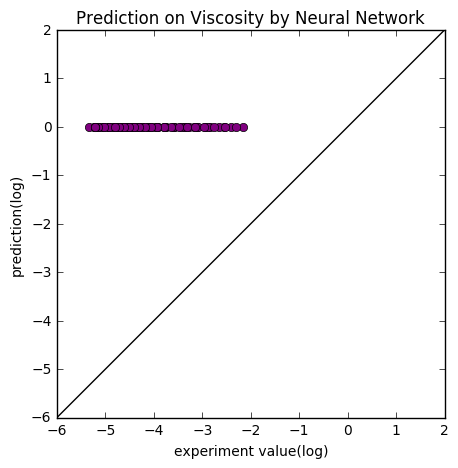

In [6]:
yh = g(X_test.dot(w1)).dot(w2)
plt.figure(figsize=(5,5))
plt.plot(Y_test,yh,"o",color ='purple')
plt.plot(np.arange(-6,2,0.0001),np.arange(-6,2,0.0001),color = 'black')
plt.axis([-6,2,-6,2])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Neural Network')
plt.show()